# Game Prediction Models Evaluation
## Needed imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import statistics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix

## Load data

In [2]:
data = pd.read_csv('PredictGamesDataset.csv')
del data['Local_Team_id']
del data['Visitor_Team_id']
data

,Local_TmOffRtg,Local_TmFloor%,Local_TmDefRtg,Local_Pace,Local_TS%,Local_eFG%,Local_FTARate,Local_3FGARate,Local_TmOR%,Local_TmDR%,...,Visitor_TS%,Visitor_eFG%,Visitor_FTARate,Visitor_3FGARate,Visitor_TmOR%,Visitor_TmDR%,Visitor_BLK%,Visitor_TOV%,Visitor_STL%,Win
0,106.326895,0.480894,100.864813,93.274918,0.579954,0.514913,0.241137,0.316263,20.654628,74.140753,...,0.538690,0.477319,0.296446,0.266108,28.615702,77.177177,5.442698,12.049168,7.804251,0
1,106.326895,0.480894,100.864813,93.274918,0.579954,0.514913,0.241137,0.316263,20.654628,74.140753,...,0.566133,0.487970,0.290705,0.318392,19.164345,77.393453,8.911307,10.418630,6.645854,1
2,106.326895,0.480894,100.864813,93.274918,0.579954,0.514913,0.241137,0.316263,20.654628,74.140753,...,0.535670,0.477748,0.217507,0.206307,23.866896,76.325088,6.382061,13.575965,7.993861,1
3,106.326895,0.480894,100.864813,93.274918,0.579954,0.514913,0.241137,0.316263,20.654628,74.140753,...,0.571810,0.508089,0.253146,0.282205,21.128451,76.812500,6.345733,13.156047,9.519718,1
4,106.326895,0.480894,100.864813,93.274918,0.579954,0.514913,0.241137,0.316263,20.654628,74.140753,...,0.567381,0.478923,0.323839,0.192538,24.899598,76.502732,8.295123,13.517942,8.438790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,106.494585,0.480980,119.635230,87.074037,0.566133,0.487970,0.290705,0.318392,19.164345,77.393453,...,0.593453,0.523714,0.321761,0.302852,22.086638,74.622532,9.150613,11.785222,8.670923,0
628,106.494585,0.480980,119.635230,87.074037,0.566133,0.487970,0.290705,0.318392,19.164345,77.393453,...,0.601352,0.521150,0.309096,0.252419,31.235828,75.572519,10.282776,13.567750,7.846969,0
629,106.494585,0.480980,119.635230,87.074037,0.566133,0.487970,0.290705,0.318392,19.164345,77.393453,...,0.579954,0.514913,0.241137,0.316263,20.654628,74.140753,9.227723,13.432928,10.002664,1
630,106.494585,0.480980,119.635230,87.074037,0.566133,0.487970,0.290705,0.318392,19.164345,77.393453,...,0.564315,0.490814,0.288426,0.299755,25.589837,75.406758,7.170966,13.369487,8.775888,1


Now we need to divide the data set into input and class for each dataset row.

In [3]:
X_unscaled = data.iloc[:, :26]
X_unscaled

,Local_TmOffRtg,Local_TmFloor%,Local_TmDefRtg,Local_Pace,Local_TS%,Local_eFG%,Local_FTARate,Local_3FGARate,Local_TmOR%,Local_TmDR%,...,Visitor_Pace,Visitor_TS%,Visitor_eFG%,Visitor_FTARate,Visitor_3FGARate,Visitor_TmOR%,Visitor_TmDR%,Visitor_BLK%,Visitor_TOV%,Visitor_STL%
0,106.326895,0.480894,100.864813,93.274918,0.579954,0.514913,0.241137,0.316263,20.654628,74.140753,...,91.701077,0.538690,0.477319,0.296446,0.266108,28.615702,77.177177,5.442698,12.049168,7.804251
1,106.326895,0.480894,100.864813,93.274918,0.579954,0.514913,0.241137,0.316263,20.654628,74.140753,...,87.074037,0.566133,0.487970,0.290705,0.318392,19.164345,77.393453,8.911307,10.418630,6.645854
2,106.326895,0.480894,100.864813,93.274918,0.579954,0.514913,0.241137,0.316263,20.654628,74.140753,...,91.688075,0.535670,0.477748,0.217507,0.206307,23.866896,76.325088,6.382061,13.575965,7.993861
3,106.326895,0.480894,100.864813,93.274918,0.579954,0.514913,0.241137,0.316263,20.654628,74.140753,...,94.194271,0.571810,0.508089,0.253146,0.282205,21.128451,76.812500,6.345733,13.156047,9.519718
4,106.326895,0.480894,100.864813,93.274918,0.579954,0.514913,0.241137,0.316263,20.654628,74.140753,...,90.892768,0.567381,0.478923,0.323839,0.192538,24.899598,76.502732,8.295123,13.517942,8.438790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,106.494585,0.480980,119.635230,87.074037,0.566133,0.487970,0.290705,0.318392,19.164345,77.393453,...,93.469083,0.593453,0.523714,0.321761,0.302852,22.086638,74.622532,9.150613,11.785222,8.670923
628,106.494585,0.480980,119.635230,87.074037,0.566133,0.487970,0.290705,0.318392,19.164345,77.393453,...,92.665032,0.601352,0.521150,0.309096,0.252419,31.235828,75.572519,10.282776,13.567750,7.846969
629,106.494585,0.480980,119.635230,87.074037,0.566133,0.487970,0.290705,0.318392,19.164345,77.393453,...,93.274918,0.579954,0.514913,0.241137,0.316263,20.654628,74.140753,9.227723,13.432928,10.002664
630,106.494585,0.480980,119.635230,87.074037,0.566133,0.487970,0.290705,0.318392,19.164345,77.393453,...,87.274997,0.564315,0.490814,0.288426,0.299755,25.589837,75.406758,7.170966,13.369487,8.775888


In [4]:
Y = data.iloc[:, 26]
Y

0      0
1      1
2      1
3      1
4      0
      ..
627    0
628    0
629    1
630    1
631    1
Name: Win, Length: 632, dtype: int64

As seen in the input data it is necessary to pre-process the data. Differences in the scales across input variables may
increase the difficulty of the problem being modeled. An example of this is that large input values can result in a
model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer
from poor performance during learning and sensitivity to input values resulting in higher generalization error.

In [5]:
scaler = StandardScaler()
scaler.fit(X_unscaled)
X = scaler.transform(X_unscaled)
X

array([[ 0.02104002, -0.3888855 , -0.81763465, ..., -1.80736562,
        -0.85192723, -0.33766863],
       [ 0.02104002, -0.3888855 , -0.81763465, ...,  0.49753131,
        -2.40555684, -1.34760684],
       [ 0.02104002, -0.3888855 , -0.81763465, ..., -1.18315728,
         0.6028549 , -0.17235959],
       ...,
       [ 0.06623411, -0.38345585,  2.03779632, ...,  0.70778998,
         0.46656447,  1.57899721],
       [ 0.06623411, -0.38345585,  2.03779632, ..., -0.65892841,
         0.40611638,  0.50944393],
       [ 0.06623411, -0.38345585,  2.03779632, ...,  0.7386699 ,
        -0.65285782, -1.44697559]])

Whe we the have data scaled, it is time to divide the original data set into training set and test set. The test set
size will be th 20% of the original dataset. Stratifying the data by the results, we manage to maintain the percentages
of each class in both resulting sets.

## Building Classifier Models
We are going to evaluate different models:
* Logistic Regression. All different solver will be evaluates (lbfgs, newton-cg, liblinear, sag, saga).
* Support Vector Machines. For classification Linear Support Vector Classifier will be used.
* Random Forest.
* Neuronal Network. For this classification Multi Layer Perceptron Classifier will be evaluated with different solvers
(lbfgs, sgd, adam)

The models will trained  in loop for 30 times to obtain the mean accuracy, then we will calculate the deviation to
display in a plot. In each iteration of the loop the dataset will be splited in training and test set.

In [6]:
train_accuracy_LR_lbfgs = []
test_accuracy_LR_lbfgs = []
train_accuracy_LR_newton_cg = []
test_accuracy_LR_newton_cg = []
train_accuracy_LR_liblinear = []
test_accuracy_LR_liblinear = []
train_accuracy_LR_sag = []
test_accuracy_LR_sag = []
train_accuracy_LR_saga= []
test_accuracy_LR_saga= []
train_accuracy_SVM = []
test_accuracy_SVM = []
train_accuracy_RF = []
test_accuracy_RF = []
train_accuracy_NN_lbfgs = []
test_accuracy_NN_lbfgs = []
train_accuracy_NN_sgd = []
test_accuracy_NN_sgd = []
train_accuracy_NN_adam = []
test_accuracy_NN_adam = []
k_fold = KFold()
for k, (train, test) in enumerate(k_fold.split(X, Y)):

    LR_lbfgs = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X[train], Y[train])
    train_accuracy_LR_lbfgs.append(LR_lbfgs.score(X[train], Y[train]))
    test_accuracy_LR_lbfgs.append(LR_lbfgs.score(X[test], Y[test]))
    LR_newton_cg = LogisticRegression(random_state=0, solver='newton-cg', multi_class='ovr').fit(X[train], Y[train])
    train_accuracy_LR_newton_cg.append(LR_newton_cg.score(X[train], Y[train]))
    test_accuracy_LR_newton_cg.append(LR_newton_cg.score(X[test], Y[test]))
    LR_liblinear = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr').fit(X[train], Y[train])
    train_accuracy_LR_liblinear.append(LR_liblinear.score(X[train], Y[train]))
    test_accuracy_LR_liblinear.append(LR_liblinear.score(X[test], Y[test]))
    LR_sag = LogisticRegression(random_state=0, solver='sag', multi_class='ovr').fit(X[train], Y[train])
    train_accuracy_LR_sag.append(LR_sag.score(X[train], Y[train]))
    test_accuracy_LR_sag.append(LR_sag.score(X[test], Y[test]))
    LR_saga = LogisticRegression(random_state=0, solver='saga', multi_class='ovr').fit(X[train], Y[train])
    train_accuracy_LR_saga.append(LR_saga.score(X[train], Y[train]))
    test_accuracy_LR_saga.append(LR_saga.score(X[test], Y[test]))

    SVM = svm.SVC(kernel='linear', probability=True).fit(X[train], Y[train])
    train_accuracy_SVM.append(SVM.score(X[train], Y[train]))
    test_accuracy_SVM.append(SVM.score(X[test], Y[test]))

    RF = RandomForestClassifier().fit(X[train], Y[train])
    train_accuracy_RF.append(RF.score(X[train], Y[train]))
    test_accuracy_RF.append(RF.score(X[test], Y[test]))

    NN_lbfgs = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1, max_iter=5000).fit(X[train], Y[train])
    train_accuracy_NN_lbfgs.append(NN_lbfgs.score(X[train], Y[train]))
    test_accuracy_NN_lbfgs.append(NN_lbfgs.score(X[test], Y[test]))
    NN_sgd = MLPClassifier(solver='sgd', alpha=1e-5, random_state=1, max_iter=5000).fit(X[train], Y[train])
    train_accuracy_NN_sgd.append(NN_sgd.score(X[train], Y[train]))
    test_accuracy_NN_sgd.append(NN_sgd.score(X[test], Y[test]))
    NN_adam = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=5000).fit(X[train], Y[train])
    train_accuracy_NN_adam.append(NN_adam.score(X[train], Y[train]))
    test_accuracy_NN_adam.append(NN_adam.score(X[test], Y[test]))

print(f'Logistic Regression solver=lbfgs -> train scores: {train_accuracy_LR_lbfgs} test scores: {test_accuracy_LR_lbfgs}')
print(f'Logistic Regression solver=newton-cg -> train scores: {train_accuracy_LR_newton_cg} '
      f'test scores: {test_accuracy_LR_newton_cg}')
print(f'Logistic Regression solver=liblinear -> train scores: {train_accuracy_LR_liblinear} '
      f'test scores: {test_accuracy_LR_liblinear}')
print(f'Logistic Regression solver=sag -> train scores: {train_accuracy_LR_sag} test scores: {test_accuracy_LR_sag}')
print(f'Logistic Regression solver=saga -> train scores: {train_accuracy_LR_saga} test scores: {test_accuracy_LR_saga}')
print(f'Support Vector Machines -> train scores: {train_accuracy_SVM} test scores: {test_accuracy_SVM}')
print(f'Random Forest -> train scores: {train_accuracy_RF} test scores: {test_accuracy_RF}')
print(f'Neuronal Network solver=lbfgs -> train scores: {train_accuracy_NN_lbfgs} test scores: {test_accuracy_NN_lbfgs}')
print(f'Neuronal Network solver=sgd -> train scores: {train_accuracy_NN_sgd} test scores: {test_accuracy_NN_sgd}')
print(f'Neuronal Network solver=adam -> train scores: {train_accuracy_NN_adam} test scores: {test_accuracy_NN_adam}')

/Users/joseluisruizcasado/anaconda3/envs/tfg-django-scikit/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/joseluisruizcasado/anaconda3/envs/tfg-django-scikit/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/joseluisruizcasado/anaconda3/envs/tfg-django-scikit/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/joseluisruizcasado/anaconda3/envs/tfg-django-scikit/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not con

Logistic Regression solver=lbfgs -> train scores: [0.699009900990099, 0.699009900990099, 0.7015810276679841, 0.7015810276679841, 0.6976284584980237] test scores: [0.6220472440944882, 0.6850393700787402, 0.626984126984127, 0.7142857142857143, 0.5396825396825397]
Logistic Regression solver=newton-cg -> train scores: [0.699009900990099, 0.699009900990099, 0.7015810276679841, 0.7015810276679841, 0.6976284584980237] test scores: [0.6220472440944882, 0.6850393700787402, 0.626984126984127, 0.7142857142857143, 0.5396825396825397]
Logistic Regression solver=liblinear -> train scores: [0.699009900990099, 0.700990099009901, 0.6996047430830039, 0.7015810276679841, 0.691699604743083] test scores: [0.6220472440944882, 0.6850393700787402, 0.6349206349206349, 0.7063492063492064, 0.5396825396825397]
Logistic Regression solver=sag -> train scores: [0.699009900990099, 0.699009900990099, 0.7015810276679841, 0.7015810276679841, 0.6976284584980237] test scores: [0.6220472440944882, 0.6850393700787402, 0.626

## Plotting the data
With stored accuracy for training and test set of each model the mean precision and standard deviation are plotted.

ind: [0 1 2 3 4 5 6 7 8 9] Mean: (10,), sv (10,)


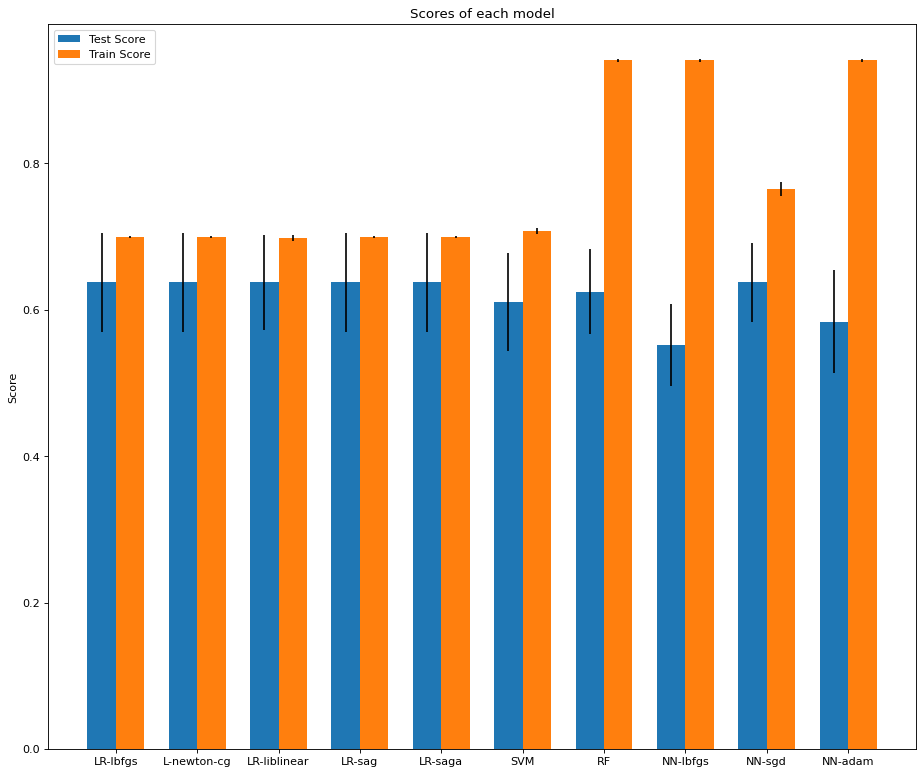

In [7]:
models = ['LR-lbfgs', 'L-newton-cg', 'LR-liblinear','LR-sag', 'LR-saga', 'SVM', 'RF', 'NN-lbfgs', 'NN-sgd', 'NN-adam']
ind = np.arange(10)
train_means_list = [sum(train_accuracy_LR_lbfgs)/len(train_accuracy_LR_lbfgs),
               sum(train_accuracy_LR_newton_cg)/len(train_accuracy_LR_newton_cg),
               sum(train_accuracy_LR_liblinear)/len(train_accuracy_LR_liblinear),
               sum(train_accuracy_LR_sag)/len(train_accuracy_LR_sag),
               sum(train_accuracy_LR_saga)/len(train_accuracy_LR_saga),
               sum(train_accuracy_SVM)/len(train_accuracy_SVM),
               sum(train_accuracy_RF)/len(train_accuracy_RF),
               sum(train_accuracy_NN_lbfgs)/len(train_accuracy_NN_lbfgs),
               sum(train_accuracy_NN_sgd)/len(train_accuracy_NN_sgd),
               sum(train_accuracy_NN_adam)/len(train_accuracy_NN_adam)
]
train_standar_deviation_list = [
    statistics.stdev(train_accuracy_LR_lbfgs),
    statistics.stdev(train_accuracy_LR_newton_cg),
    statistics.stdev(train_accuracy_LR_liblinear),
    statistics.stdev(train_accuracy_LR_sag),
    statistics.stdev(train_accuracy_LR_saga),
    statistics.stdev(train_accuracy_SVM),
    statistics.stdev(train_accuracy_RF),
    statistics.stdev(train_accuracy_NN_lbfgs),
    statistics.stdev(train_accuracy_NN_sgd),
    statistics.stdev(train_accuracy_NN_adam),
]
test_means_list = [sum(test_accuracy_LR_lbfgs)/len(test_accuracy_LR_lbfgs),
               sum(test_accuracy_LR_newton_cg)/len(test_accuracy_LR_newton_cg),
               sum(test_accuracy_LR_liblinear)/len(test_accuracy_LR_liblinear),
               sum(test_accuracy_LR_sag)/len(test_accuracy_LR_sag),
               sum(test_accuracy_LR_saga)/len(test_accuracy_LR_saga),
               sum(test_accuracy_SVM)/len(test_accuracy_SVM),
               sum(test_accuracy_RF)/len(test_accuracy_RF),
               sum(test_accuracy_NN_lbfgs)/len(test_accuracy_NN_lbfgs),
               sum(test_accuracy_NN_sgd)/len(test_accuracy_NN_sgd),
               sum(test_accuracy_NN_adam)/len(test_accuracy_NN_adam)
]
test_standar_deviation_list = [
    statistics.stdev(test_accuracy_LR_lbfgs),
    statistics.stdev(test_accuracy_LR_newton_cg),
    statistics.stdev(test_accuracy_LR_liblinear),
    statistics.stdev(test_accuracy_LR_sag),
    statistics.stdev(test_accuracy_LR_saga),
    statistics.stdev(test_accuracy_SVM),
    statistics.stdev(test_accuracy_RF),
    statistics.stdev(test_accuracy_NN_lbfgs),
    statistics.stdev(test_accuracy_NN_sgd),
    statistics.stdev(test_accuracy_NN_adam),
]
train_means = np.array(train_means_list)
train_standar_deviation = np.array(train_standar_deviation_list)
test_means = np.array(test_means_list)
test_standar_deviation = np.array(test_standar_deviation_list)
print(f'ind: {ind} Mean: {test_means.shape}, sv {test_standar_deviation.shape}')
width = 0.35
plt.figure(figsize=(14, 12), dpi=80)
plt.bar(ind, test_means, width=width, yerr=test_standar_deviation, label='Test Score')
plt.bar(ind + width, train_means, width=width,yerr=train_standar_deviation, label='Train Score')
plt.ylabel('Score')
plt.title('Scores of each model')
plt.xticks(ind + width / 2, models)
plt.legend()
plt.savefig('models-study-figures/models-score.png')
plt.show()

## Confusion Matrices
For each model we generate a confusion matrix.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

display_labels = ['Lose', 'Win']

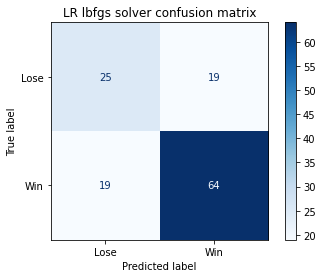

In [9]:
plot_confusion_matrix(LR_lbfgs, x_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues, normalize=None)
plt.title('LR lbfgs solver confusion matrix')
plt.savefig('models-study-figures/lr-lbfgs.png')
plt.show()

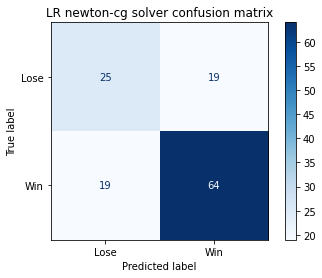

In [10]:
plot_confusion_matrix(LR_newton_cg, x_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues, normalize=None)
plt.title('LR newton-cg solver confusion matrix')
plt.savefig('models-study-figures/lr-newton-cg.png')
plt.show()

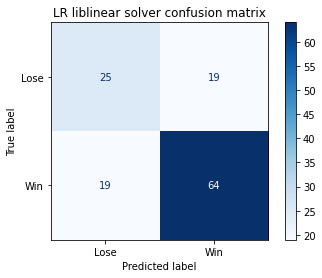

In [11]:
plot_confusion_matrix(LR_liblinear, x_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues, normalize=None)
plt.title('LR liblinear solver confusion matrix')
plt.savefig('models-study-figures/lr-liblinear.png')
plt.show()

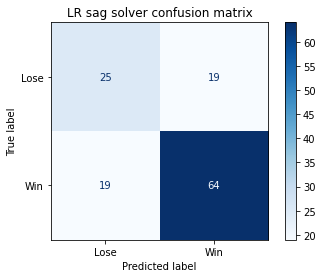

In [12]:
plot_confusion_matrix(LR_sag, x_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues, normalize=None)
plt.title('LR sag solver confusion matrix')
plt.savefig('models-study-figures/lr-sag.png')
plt.show()

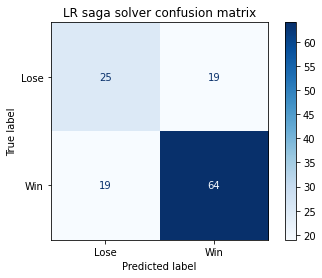

In [13]:
plot_confusion_matrix(LR_saga, x_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues, normalize=None)
plt.title('LR saga solver confusion matrix')
plt.savefig('models-study-figures/lr-saga.png')
plt.show()

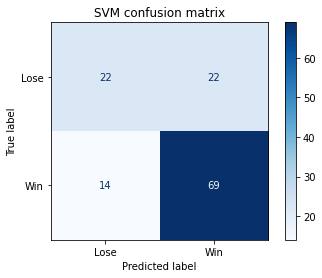

In [14]:
plot_confusion_matrix(SVM, x_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues, normalize=None)
plt.title('SVM confusion matrix')
plt.savefig('models-study-figures/svm.png')
plt.show()

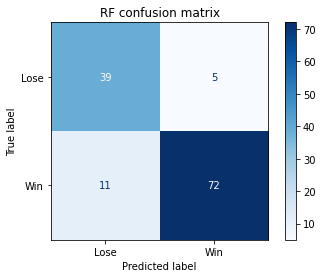

In [15]:
plot_confusion_matrix(RF, x_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues, normalize=None)
plt.title('RF confusion matrix')
plt.savefig('models-study-figures/RF.png')
plt.show()

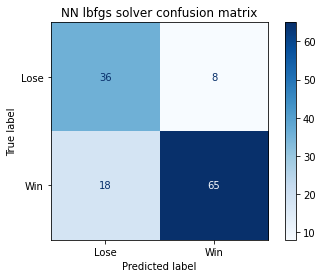

In [16]:
plot_confusion_matrix(NN_lbfgs, x_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues, normalize=None)
plt.title('NN lbfgs solver confusion matrix')
plt.savefig('models-study-figures/nn-lbfgs.png')
plt.show()

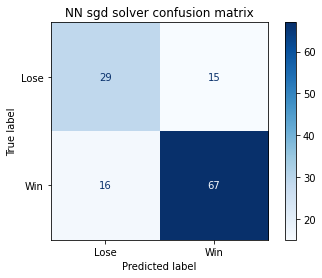

In [17]:
plot_confusion_matrix(NN_sgd, x_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues, normalize=None)
plt.title('NN sgd solver confusion matrix')
plt.savefig('models-study-figures/nn-sgd.png')
plt.show()

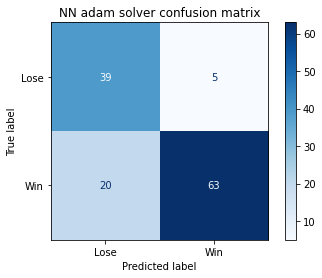

In [18]:
plot_confusion_matrix(NN_adam, x_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues, normalize=None)
plt.title('NN adam solver confusion matrix')
plt.savefig('models-study-figures/nn-adam.png')
plt.show()

## Model selection
With these information now we select the two best models to use both to build a voting classifier. With the voting 
classifier we build a more robust model based on those who have performed better.

In [19]:
VC_soft = VotingClassifier(estimators=[('lr', LR_liblinear), ('svm', SVM), ('rf', RF)], voting='soft')
VC_soft.fit(x_train, y_train)

VC_soft.score(x_test, y_test)

0.7244094488188977

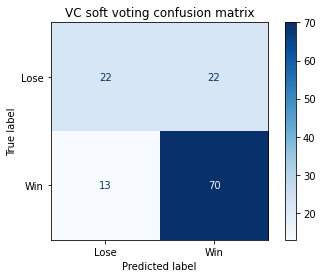

In [20]:
plot_confusion_matrix(VC_soft, x_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues, normalize=None)
plt.title('VC soft voting confusion matrix')
plt.savefig('models-study-figures/vc-soft.png')
plt.show()

In [21]:
VC_hard = VotingClassifier(estimators=[('lr', LR_liblinear), ('svm', SVM), ('rf', RF)], voting='hard')
VC_hard.fit(x_train, y_train)

VC_hard.score(x_test, y_test)

0.7086614173228346

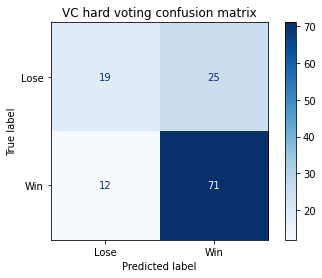

In [22]:
plot_confusion_matrix(VC_hard, x_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues, normalize=None)
plt.title('VC hard voting confusion matrix')
plt.savefig('models-study-figures/vc-hard.png')
plt.show()

## Score per Team
In the next step we are going to evaluate the score of the model for each team in the dataset.

In [25]:
data_to_predict = pd.read_csv('PredictGamesDataset.csv')
teams_id = pd.read_csv('Team_id.csv')
abbreviation = pd.read_csv('Team_id-Abbreviation.csv')

# Dataframe to save team_id and score
team_score = pd.DataFrame(columns=['Team', 'Score'])
for team_id in teams_id.iterrows():
    print(f'ID: {team_id[1].values[0]}')
    predictable_data = data_to_predict[(data_to_predict['Local_Team_id'] == team_id[1].values[0]) | 
                                       (data_to_predict['Visitor_Team_id'] == team_id[1].values[0])]
    del predictable_data['Local_Team_id']
    del predictable_data['Visitor_Team_id']
   
    x_team_unscaled = predictable_data.iloc[:, :26]
    data_scaler = StandardScaler()
    data_scaler.fit(x_team_unscaled)
    x_team = scaler.transform(x_team_unscaled)
    y_team = predictable_data.iloc[:, 26]
    team_dict = {
        'Team': abbreviation[abbreviation['team_id'] == team_id[1].values[0]].abbreviation.values[0],
        'Score': RF.score(X=x_team, y=y_team)
    }
    team_score = team_score.append(team_dict, ignore_index=True)
    
team_score.to_csv('Teams_score.csv')
team_score

ID: 1610612737
ID: 1610612738
ID: 1610612739
ID: 1610612740
ID: 1610612741
ID: 1610612742
ID: 1610612743
ID: 1610612744
ID: 1610612745
ID: 1610612746
ID: 1610612747
ID: 1610612748
ID: 1610612749
ID: 1610612750
ID: 1610612751
ID: 1610612752
ID: 1610612753
ID: 1610612754
ID: 1610612755
ID: 1610612756
ID: 1610612757
ID: 1610612758
ID: 1610612759
ID: 1610612760
ID: 1610612761
ID: 1610612762
ID: 1610612763
ID: 1610612764
ID: 1610612765
ID: 1610612766


,Team,Score
0,ATL,0.860465
1,BOS,0.857143
2,CLE,0.974359
3,NOP,0.904762
4,CHI,0.950000
5,DAL,0.930233
6,DEN,0.860465
7,GSW,0.976190
8,HOU,0.883721
9,LAC,0.948718


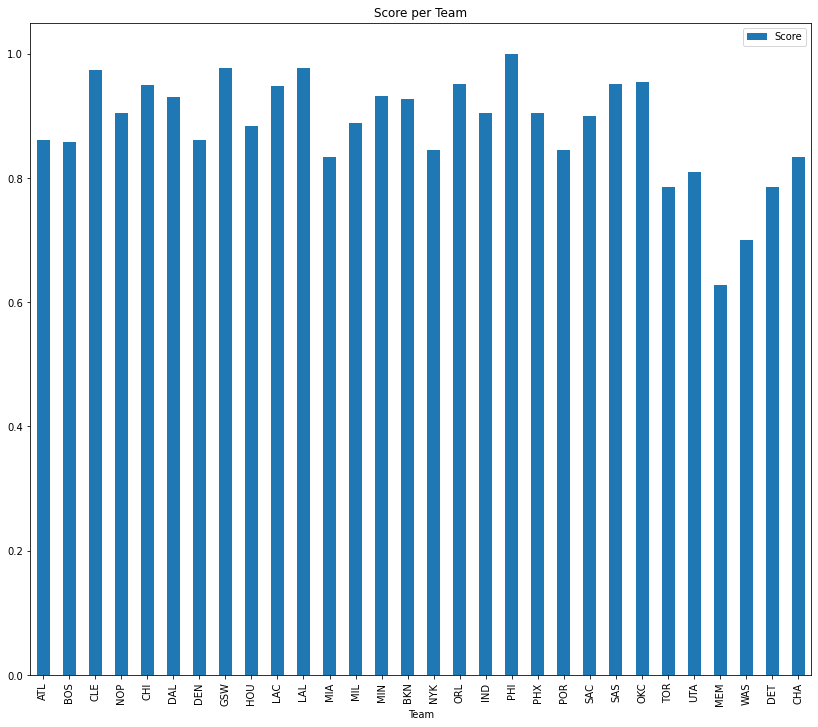

In [26]:
team_score.plot(kind='bar', x='Team', y='Score', title='Score per Team', figsize=(14, 12))

plt.savefig('models-study-figures/team_scores.png')
plt.show()